In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np

In [2]:
import os;
os.chdir("/Users/cesare.chung/Downloads/AR/")

print (os.getcwd());

/Users/cesare.chung/Downloads/AR


In [3]:
int_data  = pd.read_csv("PORE2.csv")

# Preprocess

In [5]:
#int_data.head(6)

In [7]:
#int_data2 = int_data[1:16] # Exclude HM1
#int_data2 = int_data[0:16]
int_data2 = int_data
#int_data2.head(19)

In [8]:
int_data2.isnull().sum()

Topics        10
Name          10
Score         11
Strategy      11
Innovation    11
Report        11
dtype: int64

In [9]:
int_data2.shape

(26, 6)

In [10]:
int_data2.dropna(inplace=True)

In [11]:
int_data2.shape

(15, 6)

In [13]:
#int_data2.sort_values('Strategy', ascending=False)

# Mean

In [14]:
int_data2.mean()

Score         68.164667
Strategy      75.422000
Innovation    49.122000
Report         6.617333
dtype: float64

# Groupby

In [16]:
int_data2["Strategy_C"] = 'A'
#int_data2

In [18]:
int_data2['Strategy_C'][(int_data2.Strategy < 80) & (int_data2.Strategy >= 60)] = 'B'
int_data2['Strategy_C'][(int_data2.Strategy < 60)] = 'C'
#int_data2

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
int_data2['Strategy_C'].value_counts()

A    7
B    5
C    3
Name: Strategy_C, dtype: int64

In [20]:
grouped_ =int_data2.groupby("Strategy_C")
grouped_
grouped_['Strategy','Score','Innovation','Report'].mean()

,Strategy,Score,Innovation,Report
Strategy_C,,,,
A,86.261429,77.287143,61.785714,7.022857
B,73.500000,62.698000,34.866000,6.126000
C,53.333333,55.990000,43.333333,6.490000


In [21]:
grpagg = int_data2.groupby('Strategy_C').aggregate(np.mean)
grpagg

,Score,Strategy,Innovation,Report
Strategy_C,,,,
A,77.287143,86.261429,61.785714,7.022857
B,62.698000,73.500000,34.866000,6.126000
C,55.990000,53.333333,43.333333,6.490000


In [22]:
pd.pivot_table(int_data2, index="Strategy_C")

,Innovation,Report,Score,Strategy
Strategy_C,,,,
A,61.785714,7.022857,77.287143,86.261429
B,34.866000,6.126000,62.698000,73.500000
C,43.333333,6.490000,55.990000,53.333333


In [23]:
pd.pivot_table(int_data2, index="Strategy_C", values=['Strategy','Score','Innovation','Report'], aggfunc=np.mean)

,Innovation,Report,Score,Strategy
Strategy_C,,,,
A,61.785714,7.022857,77.287143,86.261429
B,34.866000,6.126000,62.698000,73.500000
C,43.333333,6.490000,55.990000,53.333333


In [24]:
pd.pivot_table(int_data2, index=("Strategy_C","Name"), values=['Strategy','Score','Innovation','Report'], aggfunc=np.mean)

Innovation  Report  Score  Strategy
Strategy_C Name                                          
A          Catherine       61.67    6.78  76.14     85.83
           James           51.67    6.79  72.03     83.33
           Liam            52.50    7.34  79.34     88.83
           Moro            62.50    6.08  74.96     85.83
           YC              63.33    6.48  76.13     86.67
           YT1             70.00    7.98  82.95     89.17
           YT2             70.83    7.71  79.46     84.17
B          Angela          56.00    6.65  68.46     77.50
           Cesare          30.00    6.15  56.70     64.17
           HM2             30.00    7.50  64.98     75.83
           Hugh            23.33    5.00  61.02     75.83
           SM              35.00    5.33  62.33     74.17
C          JK              37.50    6.55  50.67     43.33
           Javier          55.00    6.58  61.05     59.17
           Killer          37.50    6.34  56.25     57.50

In [26]:
#pd.pivot_table(int_data2, index=("Strategy_C","Name","Topics"), values=['Strategy','Score','Innovation','Report'])
pd.pivot_table(int_data2, index=("Strategy_C","Name"), values=['Strategy','Score','Innovation','Report'])

Innovation  Report  Score  Strategy
Strategy_C Name                                          
A          Catherine       61.67    6.78  76.14     85.83
           James           51.67    6.79  72.03     83.33
           Liam            52.50    7.34  79.34     88.83
           Moro            62.50    6.08  74.96     85.83
           YC              63.33    6.48  76.13     86.67
           YT1             70.00    7.98  82.95     89.17
           YT2             70.83    7.71  79.46     84.17
B          Angela          56.00    6.65  68.46     77.50
           Cesare          30.00    6.15  56.70     64.17
           HM2             30.00    7.50  64.98     75.83
           Hugh            23.33    5.00  61.02     75.83
           SM              35.00    5.33  62.33     74.17
C          JK              37.50    6.55  50.67     43.33
           Javier          55.00    6.58  61.05     59.17
           Killer          37.50    6.34  56.25     57.50

# Subset

In [28]:
# Strategy > 75 Innovation > 60
#
int_data_Strategy = int_data2[(int_data2.Strategy >= 75) & (int_data2.Innovation >= 60 )]
int_data_Strategy = int_data_Strategy.sort_values('Strategy', ascending=False)
#int_data_Strategy

In [30]:
# Strategy > 75 Report > 6
#
int_data_Strategy = int_data2[(int_data2.Strategy >= 75) & (int_data2.Report >= 6 )]
int_data_Strategy = int_data_Strategy.sort_values('Strategy', ascending=False)
#int_data_Strategy

In [32]:
# Strategy > 75
#
int_data_Strategy = int_data2[(int_data2.Strategy >= 75)]
int_data_Strategy = int_data_Strategy.sort_values('Strategy', ascending=False)
#int_data_Strategy

In [33]:
#int_data_Strategy.to_csv("/Users/cesare.chung/Downloads/AR/PORE_Result.csv", index=False,encoding="big5")

# Plotting

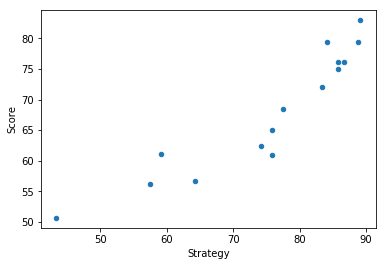

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
#int_data2.plot(kind = "scatter", x = "Strategy", y = "Report", s=[40, 120, 200])

int_data2.plot(kind = "scatter", x = "Strategy", y = "Score")
#int_data2.plot(kind = "scatter", x = "Strategy", y = "Report")
#int_data2.plot(kind = "scatter", x = "Strategy", y = "Innovation")

plt.show()

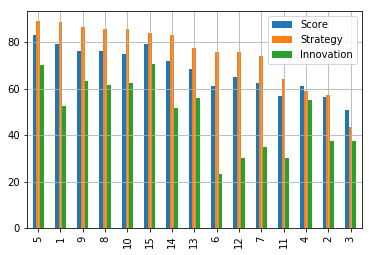

In [35]:
#int_data2.plot(kind="bar")
int_data2[['Score','Strategy','Innovation']].sort_values('Strategy', ascending=False).plot(kind="bar")

plt.grid(True)
plt.show()

In [39]:
int_data2[['Name','Strategy','Score','Innovation','Report','Strategy_C']].sort_values('Strategy', ascending=False)

,Name,Strategy,Score,Innovation,Report,Strategy_C
5,YT1,89.17,82.95,70.00,7.98,A
1,Liam,88.83,79.34,52.50,7.34,A
9,YC,86.67,76.13,63.33,6.48,A
8,Catherine,85.83,76.14,61.67,6.78,A
10,Moro,85.83,74.96,62.50,6.08,A
15,YT2,84.17,79.46,70.83,7.71,A
14,James,83.33,72.03,51.67,6.79,A
13,Angela,77.50,68.46,56.00,6.65,B
6,Hugh,75.83,61.02,23.33,5.00,B
12,HM2,75.83,64.98,30.00,7.50,B


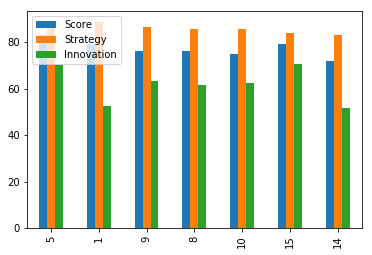

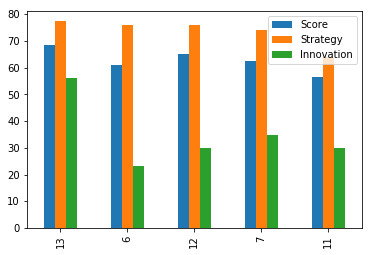

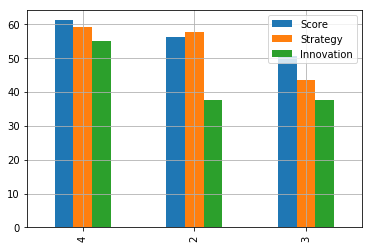

In [40]:
#h = int_data2.groupby(['Strategy_C'])
h = int_data2.sort_values('Strategy', ascending=False).groupby(['Strategy_C'])
h['Score','Strategy','Innovation'].plot(kind="bar")
#
plt.grid(True)
plt.show()

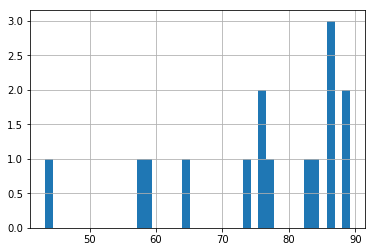

In [41]:
int_data2['Strategy'].hist(bins=40)

Strategy_C
A    Axes(0.125,0.125;0.775x0.755)
B    Axes(0.125,0.125;0.775x0.755)
C    Axes(0.125,0.125;0.775x0.755)
Name: Innovation, dtype: object

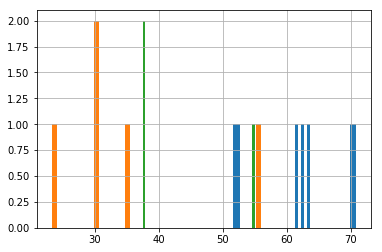

In [42]:
#
h = int_data2.groupby(['Strategy_C'])
#h['Score'].hist(bins=40)
#h['Strategy'].hist(bins=40)
#h['Report'].hist(bins=40)
h['Innovation'].hist(bins=40)
#